In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [3]:
train_data['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [5]:
test_data = pd.read_csv("test.csv")
test_data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  object 
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  object 
 8   Sub Grade                     28913 non-null  object 
 9   Employment Duration           28913 non-null  object 
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  object 
 12  Payment Plan                  28913 non-null  object 
 13  L

In [7]:
train_data.drop(['ID','Payment Plan'], axis=1, inplace=True)
test_data.drop(['ID','Payment Plan'], axis=1, inplace=True)
print(train_data.shape)
print(test_data.shape)

(67463, 33)
(28913, 33)


In [8]:
cat_cols = train_data.select_dtypes(include='object').keys()
num_cols = train_data.select_dtypes(exclude='object').keys()


In [9]:
cat_cols

Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Loan Title', 'Initial List Status',
       'Application Type'],
      dtype='object')

In [10]:
num_cols

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [11]:
for i in cat_cols:
    print(f'Train Data Feature {i} is having Below value counts')
    print(train_data[i].value_counts())

Train Data Feature Batch Enrolled is having Below value counts
BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT2558388    1963
BAT3193689    1864
BAT1930365    1844
BAT2136391    1790
BAT2333412    1775
BAT3726927    1774
BAT4136152    1766
BAT5341619    1717
BAT5525466    1709
BAT5489674    1677
BAT5629144    1639
BAT1766061    1461
BAT2833642    1421
BAT5924421    1404
BAT2522922    1399
BAT2428731    1398
BAT4808022    1303
BAT4351734    1140
BAT5547201    1127
BAT5714674    1105
BAT3461431    1068
BAT224923      895
BAT1761981     894
BAT4722912     887
BAT2003848     842
BAT1467036     802
BAT5849876     768
BAT3865626     728
BAT5811547     711
BAT1135695     296
Name: Batch Enrolled, dtype: int64
Train Data Feature Grade is having Below value counts
C    19085
B    18742
A    12055
D     8259
E     6446
F     2246
G  

In [12]:
for i in cat_cols:
    print(f'Test Data Feature {i} is having Below value counts')
    print(test_data[i].value_counts())

Test Data Feature Batch Enrolled is having Below value counts
BAT3873588    1623
BAT1586599    1404
BAT1104812    1341
BAT2252229    1297
BAT1780517    1166
BAT1184694    1086
BAT2078974    1074
BAT2803411    1071
BAT4694572    1057
BAT4271519     937
BAT3193689     890
BAT2558388     866
BAT3726927     851
BAT2575549     775
BAT4136152     756
BAT5489674     753
BAT2333412     753
BAT5924421     706
BAT2136391     704
BAT1930365     691
BAT5525466     655
BAT5629144     644
BAT5341619     615
BAT2522922     611
BAT1766061     605
BAT2833642     515
BAT3461431     492
BAT4808022     491
BAT2428731     487
BAT4722912     442
BAT4351734     439
BAT5714674     422
BAT5547201     412
BAT224923      409
BAT2003848     360
BAT1761981     327
BAT1467036     290
BAT5849876     277
BAT5811547     264
BAT3865626     250
BAT1135695     105
Name: Batch Enrolled, dtype: int64
Test Data Feature Grade is having Below value counts
C    8104
B    7996
A    5119
D    3952
E    2608
F     882
G     252
N

<AxesSubplot:>

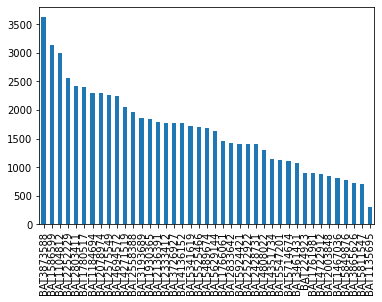

In [13]:
train_data['Batch Enrolled'].value_counts().plot(kind='bar')

<AxesSubplot:>

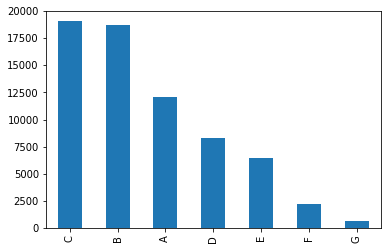

In [14]:
train_data['Grade'].value_counts().plot(kind='bar')

<AxesSubplot:>

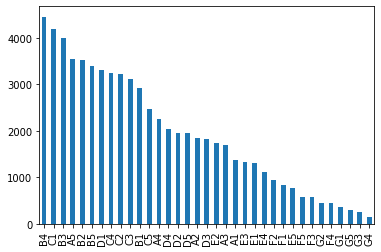

In [15]:
train_data['Sub Grade'].value_counts().plot(kind='bar')

In [16]:
train_encoded = pd.get_dummies(train_data[cat_cols], sparse=False, drop_first=True)

In [17]:
train_encoded

,Batch Enrolled_BAT1135695,Batch Enrolled_BAT1184694,Batch Enrolled_BAT1467036,Batch Enrolled_BAT1586599,Batch Enrolled_BAT1761981,Batch Enrolled_BAT1766061,Batch Enrolled_BAT1780517,Batch Enrolled_BAT1930365,Batch Enrolled_BAT2003848,Batch Enrolled_BAT2078974,...,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Initial List Status_w,Application Type_JOINT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
67459,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
67460,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
67461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
final_train_data = pd.concat([train_data[num_cols], train_encoded], axis=1)
final_train_data

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Initial List Status_w,Application Type_JOINT
0,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,13,...,0,0,0,0,0,0,0,0,1,0
1,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,12,...,0,0,0,0,0,0,0,0,0,0
2,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,14,...,0,0,0,0,0,0,0,0,1,0
3,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,7,...,0,0,0,0,0,0,0,0,1,0
4,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,13,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,9.408858,83961.15003,28.105127,1,0,13,...,0,0,0,0,0,0,0,0,1,0
67459,8323,11046,15637.46301,59,9.972104,65491.12817,17.694279,0,0,12,...,0,0,0,0,0,0,0,0,1,0
67460,15897,32921,12329.45775,59,19.650943,34813.96985,10.295774,0,0,7,...,0,0,0,0,0,0,0,0,1,0
67461,16567,4975,21353.68465,59,13.169095,96938.83564,7.614624,0,0,14,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_encoded = pd.get_dummies(test_data[cat_cols], sparse=False, drop_first=True)
test_encoded

,Batch Enrolled_BAT1135695,Batch Enrolled_BAT1184694,Batch Enrolled_BAT1467036,Batch Enrolled_BAT1586599,Batch Enrolled_BAT1761981,Batch Enrolled_BAT1766061,Batch Enrolled_BAT1780517,Batch Enrolled_BAT1930365,Batch Enrolled_BAT2003848,Batch Enrolled_BAT2078974,...,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Initial List Status_w,Application Type_JOINT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
final_test_data = pd.concat([test_data[num_cols], test_encoded], axis=1)
final_test_data

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Loan Title_home improvement,Loan Title_loan1,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Initial List Status_w,Application Type_JOINT
0,17120,10365,16025.082690,59,12.163926,76468.82190,16.749219,1,0,12,...,0,0,0,0,0,0,0,0,0,0
1,7133,11650,12615.795600,59,6.564296,38079.01344,18.157975,0,0,11,...,0,0,0,0,0,0,0,0,1,0
2,25291,25825,11621.280830,59,14.729900,51275.93268,15.190011,0,0,22,...,0,0,0,0,0,0,0,0,0,0
3,30781,9664,15375.823510,59,10.523767,68867.98965,21.292550,0,0,11,...,0,0,0,0,0,0,0,0,1,0
4,8878,9419,7176.647582,58,9.997013,91556.85423,4.812117,0,0,11,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,35000,35000,35000.000000,60,16.240000,360000.00000,7.310000,0,0,8,...,0,0,0,0,0,0,0,0,0,0
28909,25000,25000,25000.000000,60,14.980000,105000.00000,10.220000,0,1,10,...,0,0,0,0,0,0,0,0,0,0
28910,30000,30000,29950.000000,60,18.240000,74100.00000,27.300000,0,0,19,...,0,0,0,0,0,0,0,0,0,0
28911,25000,25000,24950.000000,60,15.610000,130000.00000,27.290000,2,0,12,...,0,0,0,0,0,0,0,0,0,0


In [21]:
final_test_data.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       ...
       'Loan Title_home improvement', 'Loan Title_loan1',
       'Loan Title_pay off bills', 'Loan Title_payoff', 'Loan Title_personal',
       'Loan Title_refi', 'Loan Title_relief', 'Loan Title_vacation',
       'Initial List Status_w', 'Application Type_JOINT'],
      dtype='object', length=219)

In [23]:
X = final_train_data.drop('Loan Status', axis=1).copy()
y=final_train_data['Loan Status']
#X_test = final_test_data.drop('Loan Status', axis=1).copy()
#y_test=final_test_data['Loan Status']

In [24]:
print(X.shape, y.shape)
print('-----------------------------')
#print(X_test.shape, y_test.shape)

(67463, 218) (67463,)
-----------------------------


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [27]:
X_train.shape, y_train.shape

((43850, 218), (43850,))

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train)

StandardScaler()

In [31]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
y_train.value_counts()

0    39780
1     4070
Name: Loan Status, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = pd.DataFrame(lr.predict(X_test))

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss

In [38]:
confusion_matrix(y_test, y_pred)

array([[21442,     0],
       [ 2171,     0]])

In [39]:
accuracy_score(y_test, y_pred)

0.9080591199762843

In [40]:
log_loss(y_test, y_pred)

3.175525496690429

In [41]:
def eval_matrix(true, pred, model):
    print(f"Evalution Matrixes for {model}")
    print("-------------------------------------------------")
    #confusion Matrix
    print(confusion_matrix(true, pred))
    print("-------------------------------------------------")
    #accuracy Score
    print("Accuracy_sore",accuracy_score(true, pred))
    print("-------------------------------------------------")
    #log loss
    print("log-loss",log_loss(true, pred))

In [42]:
eval_matrix(y_test, y_pred, 'Logistic Regression')

Evalution Matrixes for Logistic Regression
-------------------------------------------------
[[21442     0]
 [ 2171     0]]
-------------------------------------------------
Accuracy_sore 0.9080591199762843
-------------------------------------------------
log-loss 3.175525496690429


In [44]:
from sklearn.ensemble import RandomForestClassifier